In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Springboard coding mock interview

### 1.1 Load dataset from a text file

In [10]:
df_mock = pd.read_csv('/content/drive/MyDrive/mock_interview_dataset.txt')
df_mock

,enroll_code,student_id
0,10030,55000
1,10030,55804
2,10250,55804
3,10510,55000


### 1.2 Find out student IDs per enroll code

In [11]:
df_mock.groupby('enroll_code').count()

,student_id
enroll_code,
10030,2
10250,1
10510,1


### 1.3 Load dataset using Python standard tools

In [28]:
import csv
dict_text = []

with open('/content/drive/MyDrive/mock_interview_dataset.txt','r') as file:
  read_text = csv.DictReader(file)
  #df_text = pd.DataFrame(read_text) #This statement also works. This automatically loads the data in the dict format into a dataframe
  for row in read_text:
    dict_text.append(row)

dict_text[0]

OrderedDict([('enroll_code', '10030'), ('student_id', '55000')])

<BarContainer object of 3 artists>

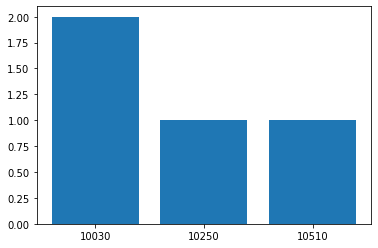

In [32]:
from collections import *

count = defaultdict(int)

for i in dict_text:
  count[i['enroll_code']] = count[i['enroll_code']] + 1 #Same concept also applies to default dicts of type list where we would append instead of add

plt.bar(count.keys(),count.values())

# OR

<BarContainer object of 3 artists>

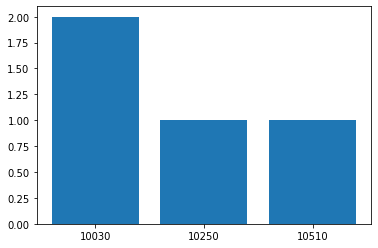

In [33]:
count_alt = []

for i in dict_text: 
  count_alt.append(i['enroll_code'])

count_alt = Counter(count_alt)
plt.bar(count_alt.keys(),count_alt.values())

# 2. Dict and *Collections* library

### 2.1 Dict.get() function

In [39]:
print (count.get('10030','not there')) #Returns the value for the key '10030'. If key is not found, returns 'not there'
print (count.get(111,'not there')) #In this case, 'not there' is returned since the key '111' doesn't exist

2
not there


### 2.2 Ordered Dict

After Python 3.6, even regular dicts store items in the order in which they are added, essentially making them the same as OrderedDicts

In [47]:
print('Regular dictionary:')
d = {}

d['c'] = 'C'
d['a'] = 'A'
d['b'] = 'B'

for k, v in d.items():
    print(k, v)

print('\nOrderedDict:')
d = OrderedDict()

d['c'] = 'C'
d['a'] = 'A'
d['b'] = 'B'

for k, v in d.items():
    print(k, v)

Regular dictionary:
c C
a A
b B

OrderedDict:
c C
a A
b B


In [48]:
d.move_to_end('c') #Change the order of a key
d

OrderedDict([('a', 'A'), ('b', 'B'), ('c', 'C')])

### 2.3 Sorting a dict

In [52]:
new_dict = {'3':[5,2],'1':[3,5,2],'2':[5,2,1]}
sorted(new_dict.items())

[('1', [3, 5, 2]), ('2', [5, 2, 1]), ('3', [5, 2])]

# 3. Dataframe manipulations

### 3.1 df.replace() function

In [58]:
df_world = pd.read_csv('/content/drive/MyDrive/world_happiness_dataset.csv')
df_world.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [59]:
df_world = df_world.replace('Finland','Vinland')
df_world.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Vinland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [60]:
df_world = df_world.replace(['Vinland','Denmark','Norway'],'Scandinavia')
df_world.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Scandinavia,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Scandinavia,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Scandinavia,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


(array([ 5.,  8., 10., 31., 21., 21., 28., 11., 12.,  9.]),
 array([2.853 , 3.3446, 3.8362, 4.3278, 4.8194, 5.311 , 5.8026, 6.2942,
        6.7858, 7.2774, 7.769 ]),
 <a list of 10 Patch objects>)

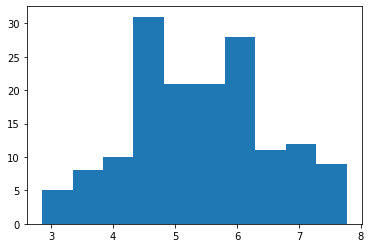

In [61]:
plt.hist(df_world['Score'])

In [64]:
df_world['Score 1'] = (df_world['Score'] > 6)
df_world['Score 1'] = df_world['Score 1'].replace([True,False],[5,10])
df_world.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score 1
0,1,Scandinavia,7.769,1.340,1.587,0.986,0.596,0.153,0.393,5
1,2,Scandinavia,7.600,1.383,1.573,0.996,0.592,0.252,0.410,5
2,3,Scandinavia,7.554,1.488,1.582,1.028,0.603,0.271,0.341,5
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,5
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,5


In [65]:
df_world

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score 1
0,1,Scandinavia,7.769,1.340,1.587,0.986,0.596,0.153,0.393,5
1,2,Scandinavia,7.600,1.383,1.573,0.996,0.592,0.252,0.410,5
2,3,Scandinavia,7.554,1.488,1.582,1.028,0.603,0.271,0.341,5
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,5
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,5
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,10
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,10
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,10
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,10


In [68]:
df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                   'B': [5, 6, 7, 8, 9],
                   'C': ['a', 'b', 'c', 'd', 'e']})

df

,A,B,C
0,0,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [67]:
df.replace({0: 10, 1: 100}) 

,A,B,C
0,10,5,a
1,100,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [69]:
df.replace({'A': 0, 'B': 5}, 100)

,A,B,C
0,100,100,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [70]:
df.replace({'A': {0: 100, 4: 400}})


,A,B,C
0,100,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,400,9,e


### 3.2 Mask, Where and Between functions

https://stackoverflow.com/questions/46168450/replace-a-specific-range-of-values-in-a-pandas-dataframe

In [73]:
new_dict = {'A':[1,2,3,4,5,6,7,8,9],'B':[11,12,13,14,15,16,17,18,19]}
df_dict = pd.DataFrame(new_dict)
df_dict

,A,B
0,1,11
1,2,12
2,3,13
3,4,14
4,5,15
5,6,16
6,7,17
7,8,18
8,9,19


In [74]:
df_dict['A'].mask(df['A']>4,100)

0      1
1      2
2      3
3      4
4      5
5    100
6    100
7    100
8    100
Name: A, dtype: int64

In [82]:
np.where(df_dict['A']>4,100,df_dict['A'])

array([  1,   2,   3,   4, 100, 100, 100, 100, 100])

# 1. Import libraries and load dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix

In [5]:
df = pd.read_csv('/content/drive/MyDrive/screening_exercise_orders_v201810.csv')
df.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
3,1003,1,2017-01-01 01:34:22,772.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       13471 non-null  int64  
 1   gender            13471 non-null  int64  
 2   date              13471 non-null  object 
 3   value             13471 non-null  float64
 4   predicted_gender  13471 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 526.3+ KB


# 2. Transforming *date* variable from string to datetime format

An overview of the loaded dataset above reveals that there are no missing values in the dataset. However, the *date* variable appears to be of the *object* or *string* type. 

Below, we convert the *date* variable to the *datetime* type which will be needed later. 

In [7]:
#Converting the date variable to datetime
df['date'] = df['date'].apply(pd.to_datetime)
print ("The converted class of the date variable is printed below")
print ()
print (type(df['date'][0]))
df.head()

The converted class of the date variable is printed below

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
3,1003,1,2017-01-01 01:34:22,772.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


# 3. Answers

### A) Assemble a dataframe with one row per customer and the following columns:

### customer_id * gender * most_recent_order_date * order_count (number of orders placed by this customer)

### Sort the dataframe by customer_id ascending and display the first 10 rows.

In order to complete this task, we would need to aggregate each variable differently by grouping the customer IDs. I have shown the steps below after displaying some initial dataset info. 

In [ ]:
df.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
3,1003,1,2017-01-01 01:34:22,772.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


In [ ]:
print ("Dataset dimensions: ",df.shape)

Dataset dimensions:  (13471, 5)


In [ ]:
print ("Number of unique customers: ",len(df['customer_id'].unique()))

Number of unique customers:  8814


Once we have the required table, we need to confirm that the dataset contains 8814 unique values corresponding to each customer. 

### Determining number of orders per customer

In [ ]:
#Grouping each customer by number of orders
df_orders = df[['customer_id','value']].groupby('customer_id').count()
df_orders = df_orders.rename(columns={'value':'number_of_orders'})
print (df_orders.shape)
df_orders.head(10)

(8814, 1)


,number_of_orders
customer_id,
1000,1
1001,1
1002,3
1003,4
1004,1
1005,2
1006,3
1007,1
1008,3


### Determining gender of each customer

To list the gender of each customer, the *customer_id* variable is grouped and the **mean** function is applied. Since all gender values for a particular customer would be the same, the mean would be the same as any of the individual values.

In [ ]:
#Grouping each customer ID by mean of all gender values
df_gender = df[['customer_id','gender']].groupby('customer_id').mean()
df_gender.head(10)

,gender
customer_id,
1000,0
1001,0
1002,1
1003,1
1004,0
1005,1
1006,1
1007,0
1008,0


### Determining most recent order date for each customer

To extrac the most recent date for each customer, we simply apply the *max* function after grouping the customer IDs. 

In [ ]:
df_date = df[['customer_id','date']]

#Grouping each customer ID by the most recent date by applying the max function
df_date = df_date.groupby('customer_id').max()
df_date = df_date.rename(columns={'date':'most_recent_date'})
print (df_date.head(10))

               most_recent_date
customer_id                    
1000        2017-01-01 00:11:31
1001        2017-01-01 00:29:56
1002        2017-02-19 21:35:31
1003        2017-04-26 02:37:20
1004        2017-01-01 03:11:54
1005        2017-12-16 01:39:27
1006        2017-05-09 15:27:20
1007        2017-01-01 15:59:50
1008        2017-12-17 05:47:48
1009        2017-01-01 19:27:17


Below, we check 2 customer IDs (**1002** and **1003**) from the original dataset to make sure that the max function was in fact extracting the most recent date. 

In [ ]:
print (df[df['customer_id']==1002])

      customer_id  gender                date  value  predicted_gender
2            1002       1 2017-01-01 01:30:31  733.0                 1
928          1002       1 2017-01-23 04:33:38  148.6                 1
1742         1002       1 2017-02-19 21:35:31  176.0                 1


In [ ]:
print (df[df['customer_id']==1003])

      customer_id  gender                date  value  predicted_gender
3            1003       1 2017-01-01 01:34:22  772.0                 1
676          1003       1 2017-01-20 05:56:10  425.5                 1
4292         1003       1 2017-04-25 09:54:54    0.0                 1
4323         1003       1 2017-04-26 02:37:20  704.0                 1


### Combining all the above grouped datasets into a single dataset

In [ ]:
#Creating a new dataframe containing unique indexes for each customer
df_id = pd.DataFrame()
df_id['customer_id'] = df_gender.index
df_id.index = df_gender.index

#The grouped dataframes are combined with the above newly created dataframe to yield our desired combined dataset
df_combined = df_id.join(df_gender).join(df_date).join(df_orders)
df_combined.index = range(df_combined.shape[0])
df_combined.head(10)

,customer_id,gender,most_recent_date,number_of_orders
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
2,1002,1,2017-02-19 21:35:31,3
3,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1
5,1005,1,2017-12-16 01:39:27,2
6,1006,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,1
8,1008,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,1


In [ ]:
df_combined.shape

(8814, 4)

Finally, we make sure that the number of rows is 8814 corresponding to each unique customer. 

### B) Plot the count of orders per week for the store.

In [ ]:
#Creating a copy of the original dataset
df_weekly_orders = df.copy()

#The index is set to the date values (datetime type) which will allow us to create a timeseries plot for any of the
#variables in the dataset
df_weekly_orders.index = df_weekly_orders['date']
df_weekly_orders.head()

,customer_id,gender,date,value,predicted_gender
date,,,,,
2017-01-01 00:11:31,1000,0,2017-01-01 00:11:31,198.5,1
2017-01-01 00:29:56,1001,0,2017-01-01 00:29:56,338.0,1
2017-01-01 01:30:31,1002,1,2017-01-01 01:30:31,733.0,1
2017-01-01 01:34:22,1003,1,2017-01-01 01:34:22,772.0,1
2017-01-01 03:11:54,1004,0,2017-01-01 03:11:54,508.0,1


To extract weekly order counts, the number of orders per 7 days are aggregated using the *resample* function and applying the *count* function as shown below.

In [ ]:
df_weekly_orders = df_weekly_orders['value'].resample('7D').count()
df_weekly_orders.head(10)

date
2017-01-01    175
2017-01-08    259
2017-01-15    356
2017-01-22    287
2017-01-29    209
2017-02-05    198
2017-02-12    233
2017-02-19    314
2017-02-26    271
2017-03-05    319
Freq: 7D, Name: value, dtype: int64

Below, the resampled order counts are plotted. 

Text(0.5, 1.0, 'Orders Per Week')

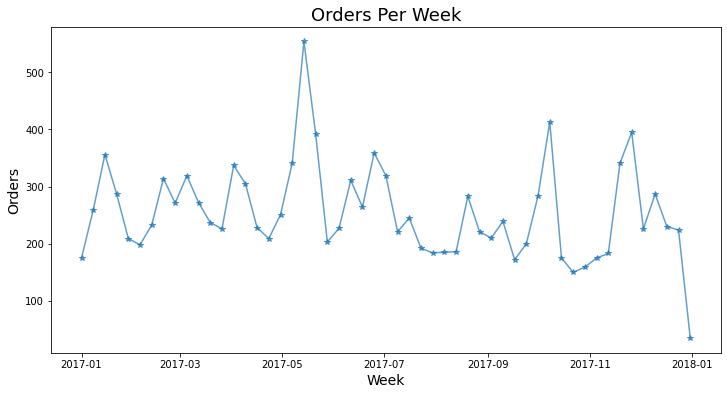

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_weekly_orders,alpha=0.7,marker='*')
plt.xlabel('Week',size=14)
plt.ylabel('Orders',size=14)
plt.title('Orders Per Week',size=18)

In [ ]:
df_weekly_orders.sort_values(ascending=False)[:10]

date
2017-05-14    554
2017-10-08    413
2017-11-26    395
2017-05-21    392
2017-06-25    359
2017-01-15    356
2017-05-07    341
2017-11-19    341
2017-04-02    337
2017-07-02    319
Name: value, dtype: int64

In [ ]:
df_weekly_orders.mean()

254.16981132075472

The above plot shows that the number of orders on the 3rd week of May has a spike (554 orders) whereas the mean is 254.1698. It could be worth investigating the reason for this spike. 

### C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant? Justify your choice of method.

To compare means for the two genders, we can do a two-sided hypothesis test for the difference of means. First, we would need to create two separate datasets, one for each gender. Then we can use the T-test to determine if the difference in means is signigicant or not using the resulting *p-value*. 

**Hypothesis**
- *Null hypothesis (No)*: gender 0 mean = gender 1 mean
- *Alternate hypothesis (Na)*: gender 0 mean != gender 1 mean

We can use a significance level of 5% which is a standard value. If our resulting p-value is less than the significance level, we can reject the null hypothesis which would indicate that the difference in means is significant. If the p-value is greater, then we cannot reject the null which would mean that the difference in mean is not significant and it occurred due to chance. 

In [ ]:
#Grouping gender and applying the describe function to the order values
df_mean_order_value = df.groupby('gender')['value'].describe()
df_mean_order_value

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,6759.0,363.890006,396.533215,0.0,161.93,258.0,434.0,8046.3
1,6712.0,350.708361,377.504737,0.0,161.20,258.0,416.0,6877.0


The means of gender 0 and 1 are 363.89 and 350.7 respectively. The gender 0 mean is slightly higher than gender 1. 

In [ ]:
#Separating the dataset into the two genders
df_gender_0 = df[df['gender']==0]
df_gender_1 = df[df['gender']==1]

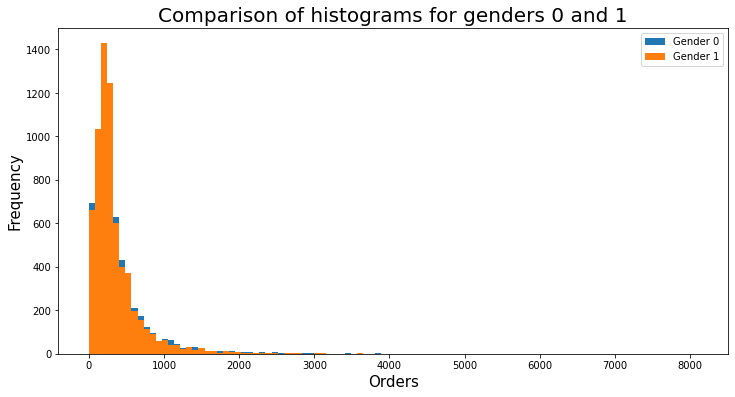

In [ ]:
#Plotting histograms for both genders
plt.figure(figsize=(12,6))
plt.hist(df_gender_0['value'],range=(0,8100),bins=100,label='Gender 0')
plt.hist(df_gender_1['value'],range=(0,8100),bins=100,label='Gender 1')
plt.xlabel("Orders",size=15)
plt.ylabel("Frequency",size=15)
plt.title("Comparison of histograms for genders 0 and 1",size=20)
plt.legend()
plt.show()

Above, we plotted the 2 datasets containing the different genders and in general, the plots seem to overlap with each other. Both sets of data have a right-skewed shape and seem to have negligible differences in mean. 

In order to determine if there is a significant shift in means between the two genders, we first sampled 500 rows from each dataset and then applied the T-test for two independent samples. 

In [ ]:
#Random sampling 500 rows from each gender dataset
rs_gender_0 = np.random.choice(df_gender_0['value'],500)
rs_gender_1 = np.random.choice(df_gender_1['value'],500)
print ("Gender 0 sample size: ",len(rs_gender_0))
print ("Gender 1 sample size: ",len(rs_gender_1))

Gender 0 sample size:  500
Gender 1 sample size:  500


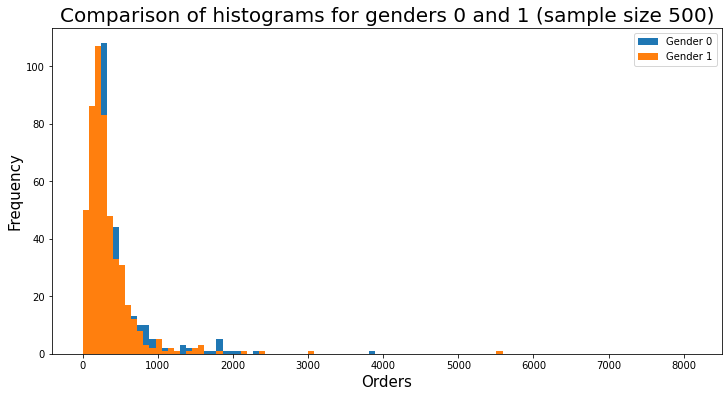

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(rs_gender_0,range=(0,8100),bins=100,label="Gender 0")
plt.hist(rs_gender_1,range=(0,8100),bins=100,label="Gender 1")
plt.xlabel("Orders",size=15)
plt.ylabel("Frequency",size=15)
plt.title("Comparison of histograms for genders 0 and 1 (sample size 500)",size=20)
plt.legend()
plt.show()

Below, we conduct the T-test using the *scipy.stats.ttest_ind* function. This function requires that the variances of the two samples are equal. The standard deviation for genders 0 and 1 are 396.53 and 377.5 respecively which are similar so we can safely apply the function. 

The T-test also requires the two samples to have independent data points. This is ensured by randomly sampling the values from the original dataset. 

In [ ]:
st.ttest_ind(pd.Series(rs_gender_0),pd.Series(rs_gender_1))

Ttest_indResult(statistic=1.847307063042724, pvalue=0.0649984683390511)

The p-value is 0.58 (58%) which is much larger than our significance value of 5%. Hence, we cannot reject the null hypothesis and hence there does not seem to be a significant shift in means between the two genders. 

### D) Generate a confusion matrix for the gender predictions of customers in this dataset. You should assume that there is only one gender prediction for each customer. What does the confusion matrix tell you about the quality of the predictions?

In [ ]:
df_gender_pred = df[['customer_id','predicted_gender']].groupby('customer_id').mean()
df_gender_pred.head(10)

,predicted_gender
customer_id,
1000,1
1001,1
1002,1
1003,1
1004,1
1005,0
1006,1
1007,0
1008,0


Below, we create a new dataframe containing the actual and predicted gender values. The prior generated dataset containing each row as a unique customer ID is used for this analysis. 

In [ ]:
#Creating a new dataframe containing the customer id and the indexes from the dataset containing unique customer IDs
df_pred = pd.DataFrame()
df_pred['customer_id'] = df_gender.index
df_pred.index = df_gender.index

#The actual and predicted gender datasets are combined
df_pred_results = df_pred.join(df_gender).join(df_gender_pred)
df_pred_results.index = range(df_pred_results.shape[0])
df_pred_results.head(10)

,customer_id,gender,predicted_gender
0,1000,0,1
1,1001,0,1
2,1002,1,1
3,1003,1,1
4,1004,0,1
5,1005,1,0
6,1006,1,1
7,1007,0,0
8,1008,0,0
9,1009,1,1


In [ ]:
#Verifying that the 
df_pred_results.shape

(8814, 3)

In [ ]:
#Generating confusion matrix values
tn, fp, fn, tp = confusion_matrix(df_pred_results['gender'],df_pred_results['predicted_gender']).ravel()
print ("True negatives: ",tn)
print ("False positives: ",fp)
print ("False negatives: ",fn)
print ("True positives: ",tp)

True negatives:  2189
False positives:  2218
False negatives:  895
True positives:  3512


Below, we use the confusion matrix values to generate various scoring metrics. 

In [ ]:
accuracy = ((tn+tp)/(tn+tp+fn+fp))*100
print ("Accuracy: ",accuracy)

precision = tp/(tp+fp)
print ("Precision: ",precision)

recall = tp/(tp+fn)
print ("Recall: ",recall)

f1_score = (2*precision*recall)/(precision+recall)
print ("F1 score: ",f1_score)

Accuracy:  64.6811890174722
Precision:  0.612914485165794
Recall:  0.7969140004538234
F1 score:  0.6929071717470652


The accuracy is relatively low at 64.68%. So the model is not great when it comes to accurately predicting each customer's gender. The case is similar with the precision. The recall is relatively higher, which could mean that the prediction model may have been tuned to yield higher **true positive** values at the expense of higher **false positives**. Generally, a higher recall score is prioritized if we want to reduce **false negatives**.  

For example, if we have a model to predict that a patient has cancer, we would rather have a wrong positive diagnosis than a wrong negative diagosis, which would prevent the patient from receiving the appropriate treatment and attention. 

In this case, it is not clear which gender is actually 0 and 1. However, if there is a concern for a certain gender, optimizing recall might be helpful.

### E) Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. Limit your answer to one paragraph, and please be specific.

I used Python's Pandas, Matplotlib and Numpy libraries at work to conduct some simple delta analysis and anomaly detection for a new **product qualification process**. During this process, a handful of semiconductor parts are put through stresses (electrical, mechanical, temperature etc.) at different points of time, where data is collected after each stress to check for failures or shifts. I built a Python script to visualize the test performance of each part across each read point. This insightful graph gave us two pieces of valuable information: 
1. Is there a systematic shift in performance across all parts due to the stress
2. Has a specific part shifted in performance during any one of the stresses

The type of shift (if any) would dictate the next steps. If there is a systematic shift, there is likely a problem with the chip's circuit design and we may need to revise it immediately before official release. It could also indicate an issue with the test itself. If just one of the parts has shifted from one read point to another, there could have been some damage to that specific part and may not indicate a larger problem with the design or the test. 